In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
data = pd.read_csv("german_credit.csv")
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
data.shape

(1000, 21)

In [5]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default,1000,NaN,NaN,NaN,0.3,0.458487,0,0,0,1,1
account_check_status,1000,4,no checking account,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_in_month,1000,NaN,NaN,NaN,20.903,12.0588,4,12,18,24,72
credit_history,1000,5,existing credits paid back duly till now,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,10,domestic appliances,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1000,NaN,NaN,NaN,3271.26,2822.74,250,1365.5,2319.5,3972.25,18424
savings,1000,5,... < 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_emp_since,1000,5,1 <= ... < 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_as_income_perc,1000,NaN,NaN,NaN,2.973,1.11871,1,2,3,4,4
personal_status_sex,1000,4,male : single,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data1 = pd.get_dummies(data)
data1.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [8]:
data.corr();

In [9]:
#There's a high correlation between credit_amount & duration in month

### Drop the original variables which are converted to dummy

In [10]:
data.select_dtypes(exclude="number").columns


Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [11]:
data1.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

In [12]:
#All the initial non-numeric columns are converted to one-hot encoding. The original columns are already removed (in data1)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [13]:
X = data1.drop(columns='default')
y = data1['default']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=4)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [19]:
y_pred = model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
confusion_matrix(y_test,y_pred)

array([[188,  15],
       [ 65,  32]])

In [22]:
accuracy_score(y_test,y_pred)

0.7333333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [23]:
model.feature_importances_

array([0.07371517, 0.09461558, 0.03551586, 0.03346291, 0.07759478,
       0.0194825 , 0.01096357, 0.01822613, 0.03000082, 0.00835255,
       0.05066439, 0.01008947, 0.02465557, 0.00966875, 0.01383823,
       0.01139953, 0.01087838, 0.00957894, 0.01625553, 0.0085238 ,
       0.01686303, 0.0024853 , 0.00186669, 0.0129304 , 0.00119386,
       0.00073436, 0.0051655 , 0.02102013, 0.00900548, 0.00586972,
       0.0166506 , 0.01276586, 0.01265057, 0.01632196, 0.01234712,
       0.01138076, 0.01651531, 0.00578492, 0.00819662, 0.01668543,
       0.00591607, 0.00868078, 0.01000714, 0.01322241, 0.01387225,
       0.01633468, 0.01183759, 0.01313565, 0.01691613, 0.00785994,
       0.00791068, 0.01339568, 0.01058389, 0.01267902, 0.0161903 ,
       0.00222876, 0.01105969, 0.01346906, 0.01303857, 0.00387527,
       0.00387036])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
# Use below values
num_folds = 10
seed = 77

In [26]:
#Validate the Random Forest model build above using k fold

In [27]:
kfold = KFold(n_splits=num_folds,random_state=seed)

In [28]:
scores = cross_val_score(model,data1.drop(columns='default'),data1['default'],cv=kfold)
scores

array([0.86, 0.71, 0.76, 0.79, 0.8 , 0.67, 0.74, 0.8 , 0.76, 0.76])

In [29]:
#Calculate Mean score

In [30]:
scores.mean()

0.765

In [31]:
# Calculate score standard deviation using std()

In [32]:
scores.std()

0.049849774322458074

In [33]:
#Our Model accuracy is 73% which is close to K-Fold accuracy. Also it is between µ +/- 1σ

# Q8 Print the confusion matrix( 1 Marks)

In [34]:
confusion_matrix(y_test,y_pred)

array([[188,  15],
       [ 65,  32]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [46]:
from sklearn.metrics import classification_report

In [49]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
f1-score,0.838013,0.452555,0.75,0.645284,0.713381
precision,0.746154,0.775000,0.75,0.760577,0.755481
recall,0.955665,0.319588,0.75,0.637626,0.750000
support,203.000000,97.000000,0.75,300.000000,300.000000


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [38]:
#Hint: Use roc_curve

In [50]:
from sklearn.metrics import roc_curve,auc
true,false,pattern = roc_curve(y_test,y_pred)

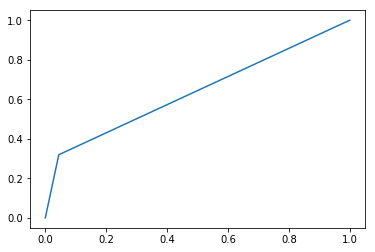

In [51]:
sns.lineplot(true,false);

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [41]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

auc(recall,precision)

0.6137073188564743

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [43]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [44]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.735
Standard deviation:  0.010027739304327557
